<a href="https://colab.research.google.com/github/maxwellmogambi/buy_rent_kenya_EDA/blob/main/Buy_Rent_kenya_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import string
from scipy.stats import ttest_ind
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
data = pd.read_csv('/content/apartment_data.csv')

In [4]:
df = pd.DataFrame(data)

In [5]:
# Adjust pandas settings to ensure all columns are displayed
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # No limit on display width
pd.set_option('display.expand_frame_repr', False)

# Exploratory Data Analysis (EDA) for Housing Data

## 1. Overview of the Data
- **Shape of the Dataset**: Check the number of rows and columns.
- **Data Types**: Verify the data types of each column.
- **Missing Values**: Identify any missing values in the dataset and their proportions.
- **Summary Statistics**: Calculate mean, median, standard deviation, minimum, and maximum for numerical features.

## 2. Distribution Analysis
- **Price Distribution**: Plot the distribution of house prices using histograms and box plots.
- **Price Bins**: Analyze the distribution of houses across different price bins.
- **Bathrooms and Bedrooms Distribution**: Plot histograms and box plots for the number of bathrooms and bedrooms.

## 3. Geographic Analysis
- **Top Preferred Suburbs**: Identify and visualize the most common suburbs where houses are listed.
- **Suburb vs. Price**: Analyze the average house prices per suburb using bar plots or box plots.
- **Suburb vs. Features**: Explore how different features (e.g., external and internal features) vary across suburbs.

## 4. Feature Analysis
- **External and Internal Features**: Count the occurrences of each feature and identify the most common ones.
- **Feature Combinations**: Investigate common combinations of features in houses.
- **Correlation Analysis**: Compute and visualize the correlation matrix to see relationships between numerical features.

## 5. Price Influencers
- **Price vs. Bathrooms**: Analyze the relationship between the number of bathrooms and house prices.
- **Price vs. Bedrooms**: Analyze the relationship between the number of bedrooms and house prices.
- **Price vs. External/Internal Features**: Investigate how different features influence house prices.

## 7. Nearby Amenities
- **Top Nearby Amenities**: Identify and visualize the most common nearby amenities (e.g., schools, shopping centers).
- **Impact of Nearby Amenities on Price**: Analyze how the presence of certain amenities influences house prices.

## 8. Text Analysis
- **Title Analysis**: Perform text analysis on the titles to identify common words or phrases.
- **Word Clouds**: Create word clouds for the most frequent words in the titles.

## 9. Outlier Detection
- **Price Outliers**: Identify and visualize outliers in house prices using box plots.
- **Feature Outliers**: Identify outliers in other numerical features (e.g., unusually high number of bathrooms or bedrooms).

## 10. Comparative Analysis
- **Comparison by Suburb**: Compare different suburbs based on various features (e.g., average price, common features).
- **Comparison by Feature**: Compare houses with certain features (e.g., houses with swimming pools vs. houses without swimming pools).

## 11. Clustering Analysis
- **Cluster Houses**: Use clustering algorithms (e.g., K-Means) to group houses into clusters based on features and analyze the characteristics of each cluster.

## 12. Visualization Techniques
- **Bar Plots**: For categorical data analysis (e.g., top preferred suburbs).
- **Box Plots**: For understanding the distribution and outliers in numerical data.
- **Histograms**: For visualizing the distribution of numerical features.
- **Heatmaps**: For correlation analysis.
- **Scatter Plots**: For analyzing relationships between two numerical features.
- **Word Clouds**: For text analysis of the titles.


# Data Overview

In [ ]:
#checking shape
df.shape

(2629, 8)

In [ ]:
#checking data types
df.dtypes

bathrooms             int64
bedrooms              int64
external_features    object
internal_features    object
location             object
nearby               object
price                 int64
title                object
dtype: object

In [ ]:
#checking missing values
df.isna().sum()

bathrooms              0
bedrooms               0
external_features     66
internal_features     79
location               0
nearby               409
price                  0
title                  0
dtype: int64

In [6]:
#threshold of droping null values is 5%
threshold = len(df) * 0.05
#creating a filter
columns_to_drop = df.columns[df.isna().sum()<=threshold]
print(columns_to_drop)

Index(['bathrooms', 'bedrooms', 'external_features', 'internal_features', 'location', 'price',
       'title'],
      dtype='object')


In [7]:
# dropping null values below the threshold
df.dropna(subset=columns_to_drop,inplace=True)

In [8]:
# Calculate the mode of the 'nearby' column
mode_value = df['nearby'].mode()[0]  # Extract the first mode value from the Series

# Fill null values in the 'nearby' column with the mode value
df['nearby'].fillna(mode_value, inplace=True)

In [9]:
#checking missing values
df.isna().sum()

bathrooms            0
bedrooms             0
external_features    0
internal_features    0
location             0
nearby               0
price                0
title                0
dtype: int64

# Descriptive Statistics


In [ ]:
df.describe()

,bathrooms,bedrooms,price
count,2525.000000,2525.000000,2.525000e+03
mean,2.727525,2.627723,2.511536e+05
std,1.020887,0.929798,1.784263e+06
min,1.000000,1.000000,1.000000e+03
25%,2.000000,2.000000,1.150000e+05
50%,3.000000,3.000000,1.700000e+05
75%,3.000000,3.000000,2.500000e+05
max,9.000000,8.000000,7.100000e+07


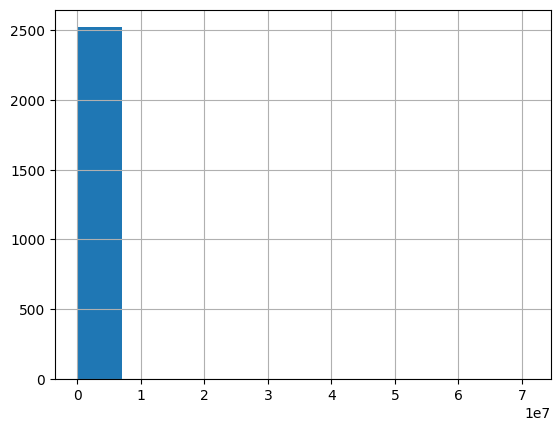

In [ ]:
# Distribution of the target variable
df['price'].hist()
plt.show()

# Distribution and Outlier Detection Analysis

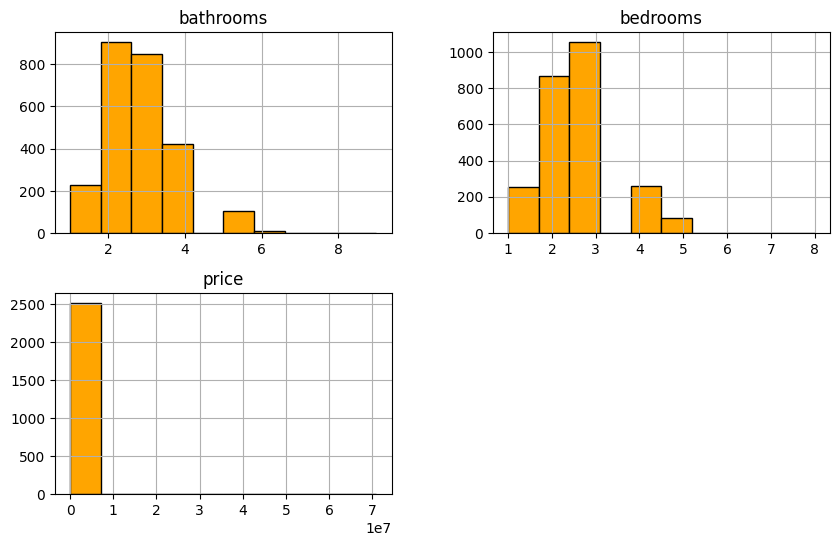

In [ ]:
cv df.hist(color='orange',edgecolor='black',figsize=(10,6))
plt.show()

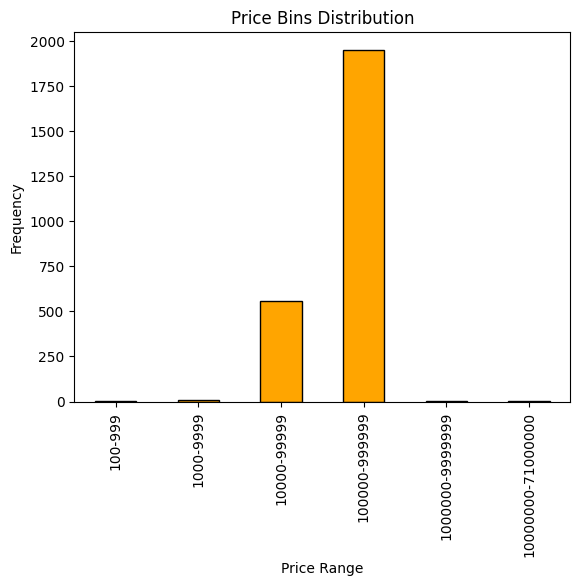

In [24]:
# Define custom bins
custom_bins = [100, 1000, 10000, 100000, 1000000, 10000000, 44000000]
# Create the bins using the defined ranges
df['price_bin'] = pd.cut(df['price'], bins=custom_bins, labels=['100-999', '1000-9999', '10000-99999', '100000-999999', '1000000-9999999', '10000000-71000000'])

# Visualize the distribution with a bar plot
df['price_bin'].value_counts().sort_index().plot(kind='bar', color='orange', edgecolor='black')

# Set plot titles and labels
plt.title('Price Bins Distribution')
plt.xlabel('Price Range')
plt.ylabel('Frequency')

# Display the plot
plt.show()

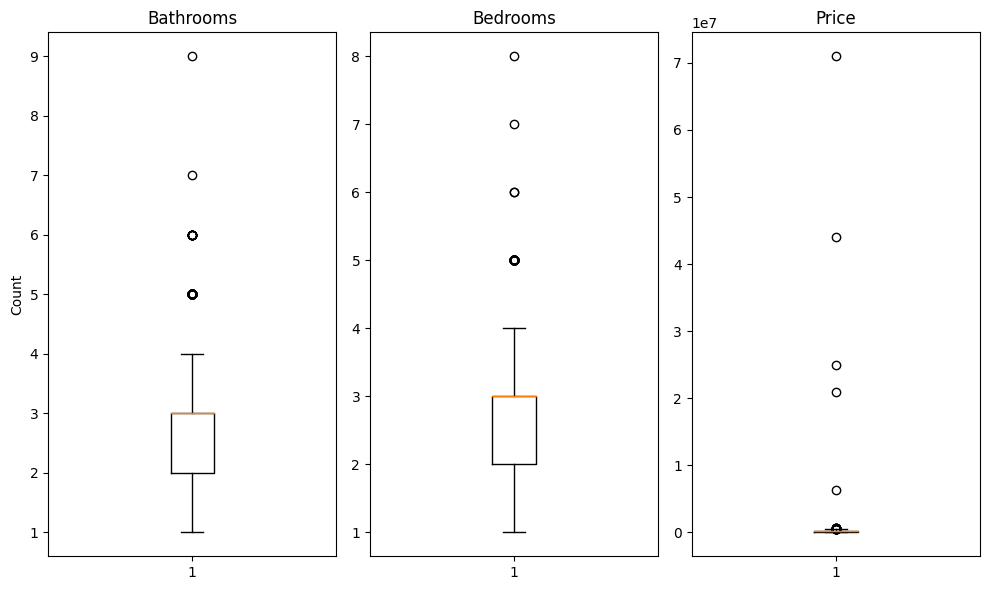

In [ ]:
#Cheking for outliers
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[10, 6])

# Box plot for bathrooms
ax1.boxplot(df['bathrooms'])
ax1.set_title("Bathrooms")
ax1.set_ylabel("Count")

# Box plot for bedrooms
ax2.boxplot(df['bedrooms'])
ax2.set_title("Bedrooms")

# Box plot for price
ax3.boxplot(df['price'])
ax3.set_title("Price")

# Display all plots in one figure
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [ ]:
#investigating the outliers
x = df['bathrooms']>3
df[x].tail()

,bathrooms,bedrooms,external_features,internal_features,location,nearby,price,title
2595,4,3,"Balcony,Gym,BBQ,Lift/Elevator,CCTV,Parking,Ele...","Aircon,Furnished,Alarm,Serviced,Backup Generat...","Nyali, Mkomani","Golf Course,Hospital,Scenic View,School,Sea Vi...",250000,Serviced 3 Bed Apartment with En Suite in Mkomani
2601,4,4,"Balcony,BBQ,CCTV,Electric Fence,Borehole,Garde...","Aircon,Alarm,Backup Generator,En Suite,Fibre I...","Peponi Road, 0408p, Spring Valley, Westlands","Bus Stop,Hospital,Scenic View,School,Shopping ...",450000,4 Bed Apartment with En Suite at Peponi Road
2604,4,4,"Balcony,BBQ,CCTV,Electric Fence,Borehole,Garde...","Aircon,Alarm,Backup Generator,En Suite,Fibre I...","Off Parklands Road, 0408 p, Parklands, Westlands","Bus Stop,Hospital,Scenic View,School,Shopping ...",170000,4 Bed Apartment with En Suite at Off Parklands...
2626,4,4,"Parking,Electric Fence,Garden","Service Charge Included,En Suite,Backup Genera...",Karen,"Shopping Centre,Golf Course,Bus Stop,Hospital,...",330000,4 Bed Apartment with En Suite in Karen
2628,4,4,"Balcony,CCTV,Electric Fence,Gym,Lift/Elevator,...","Alarm,Backup Generator,En Suite,Fibre Internet...",Muthaiga,"Bus Stop,Hospital,Scenic View,School,Shopping ...",360000,4 Bed Apartment with En Suite in Muthaiga


In [ ]:
# correlation matrix
numerical_columns = df.select_dtypes(include='int64')
correlation_matrix = numerical_columns.corr()
correlation_matrix


,bathrooms,bedrooms,price
bathrooms,1.000000,0.847254,0.058430
bedrooms,0.847254,1.000000,0.046092
price,0.058430,0.046092,1.000000


#  Price Influencers

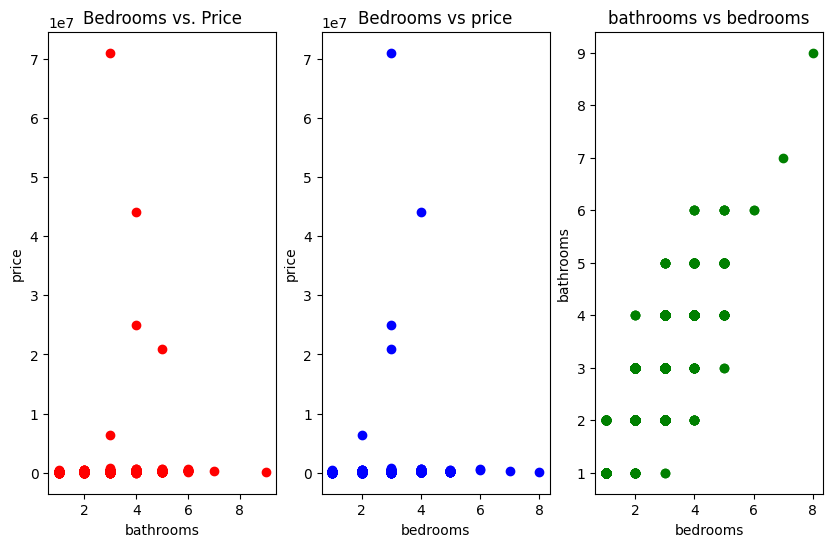

In [ ]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,6))
ax1.scatter(x='bathrooms', y='price',color='r', data=df)
ax1.set_xlabel('bathrooms')
ax1.set_ylabel('price')
ax1.set_title("Bedrooms vs. Price")

ax2.scatter(x='bedrooms', y='price',color='b', data=df)
ax2.set_title('Bedrooms vs price')
ax2.set_xlabel('bedrooms')
ax2.set_ylabel('price')

ax3.scatter(x='bedrooms', y='bathrooms',color='g', data=df)
ax3.set_title('bathrooms vs bedrooms')
ax3.set_xlabel('bedrooms')
ax3.set_ylabel('bathrooms')


plt.show()

# Feature and Statistical Analysis

In [15]:
def find_common_features(df, column_name, top_n=5):
    # Flatten the list of features for the specified column
    features = df[column_name].str.split(',').explode()
    # Get the most common features
    most_common = [feature for feature, _ in Counter(features).most_common(top_n)]
    return most_common

def create_common_feature_columns(df, external_top_n=5, internal_top_n=5, nearby_top_n=5):
    # Identify the most common features for each type
    common_external = find_common_features(df, 'external_features', external_top_n)
    common_internal = find_common_features(df, 'internal_features', internal_top_n)
    common_nearby = find_common_features(df, 'nearby', nearby_top_n)

    # Function to check and return common features as a comma-separated string
    def get_common_features(row, common_features, column_name):
        features = row[column_name].split(',')
        return ','.join([feature for feature in features if feature in common_features])

    # create new columns
    df['common_external'] = df.apply(lambda row: get_common_features(row, common_external, 'external_features'), axis=1)
    df['common_internal'] = df.apply(lambda row: get_common_features(row, common_internal, 'internal_features'), axis=1)
    df['common_nearby'] = df.apply(lambda row: get_common_features(row, common_nearby, 'nearby'), axis=1)

    return df

In [16]:
# Apply the function to create common feature columns
df = create_common_feature_columns(df)

In [17]:
# Function to count and plot the common features
def plot_common_features(column_name, title):
    # Flatten the list of features
    features = df[column_name].str.split(',').explode()
    # Count the occurrences of each feature
    feature_counts = Counter(features)
    # Convert to DataFrame for plotting
    feature_df = pd.DataFrame.from_dict(feature_counts, orient='index', columns=['count'])
    feature_df = feature_df.reset_index().rename(columns={'index': 'feature'})
    feature_df = feature_df.sort_values(by='count', ascending=False)

    # Plot the bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='count', y='feature', data=feature_df,color='orange')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Feature')
    plt.show()



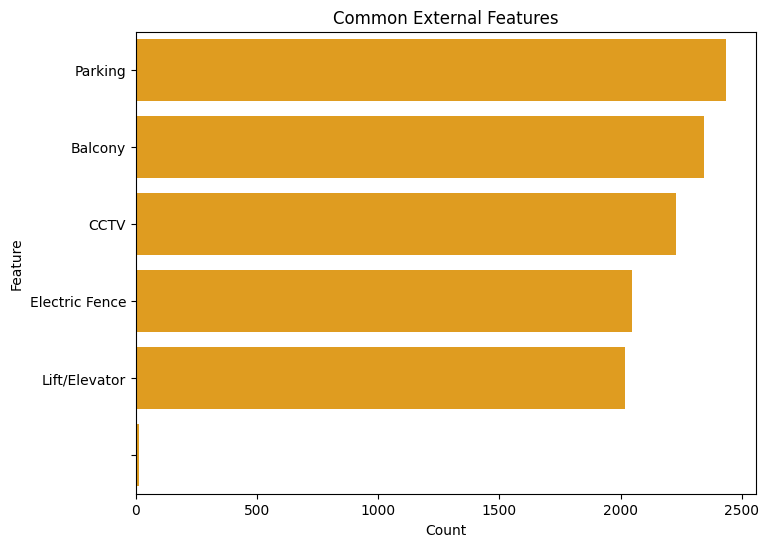

In [18]:
# Plot the common external features
plot_common_features('common_external', 'Common External Features')

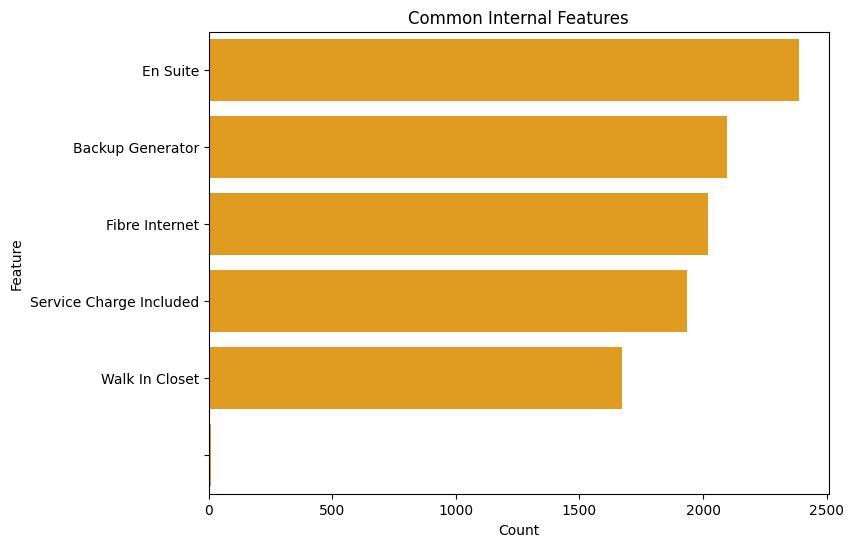

In [ ]:
# Plotting the common internal features
plot_common_features('common_internal', 'Common Internal Features')

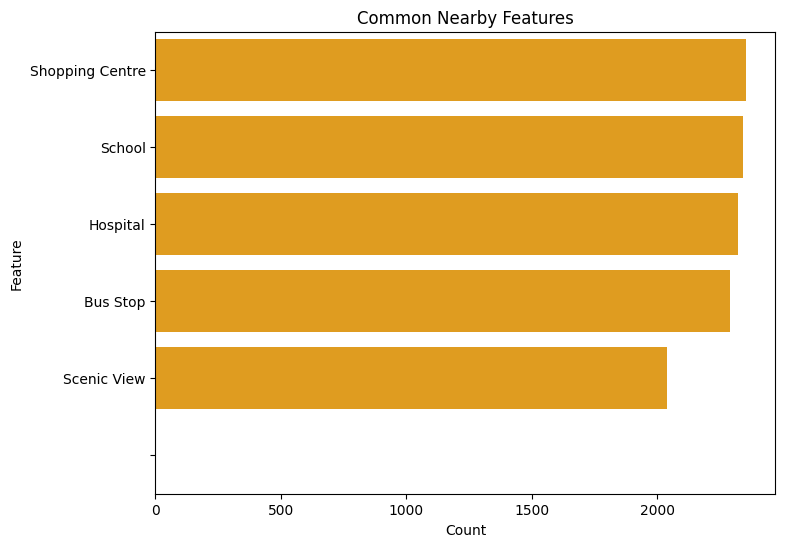

In [ ]:
# Plotting the common nearby features
plot_common_features('common_nearby', 'Common Nearby Features')

# Nearby Ammenities

In [20]:
def get_top_features(column_name, n=5):
    features = df[column_name].str.split(',').explode()
    top_features = [item[0] for item in Counter(features).most_common(n)]
    return top_features

top_external_features = get_top_features('external_features')
top_internal_features = get_top_features('internal_features')

for feature in top_external_features:
    df[f'has_{feature}'] = df['external_features'].apply(lambda x: 1 if feature in x else 0)

for feature in top_internal_features:
    df[f'has_{feature}'] = df['internal_features'].apply(lambda x: 1 if feature in x else 0)


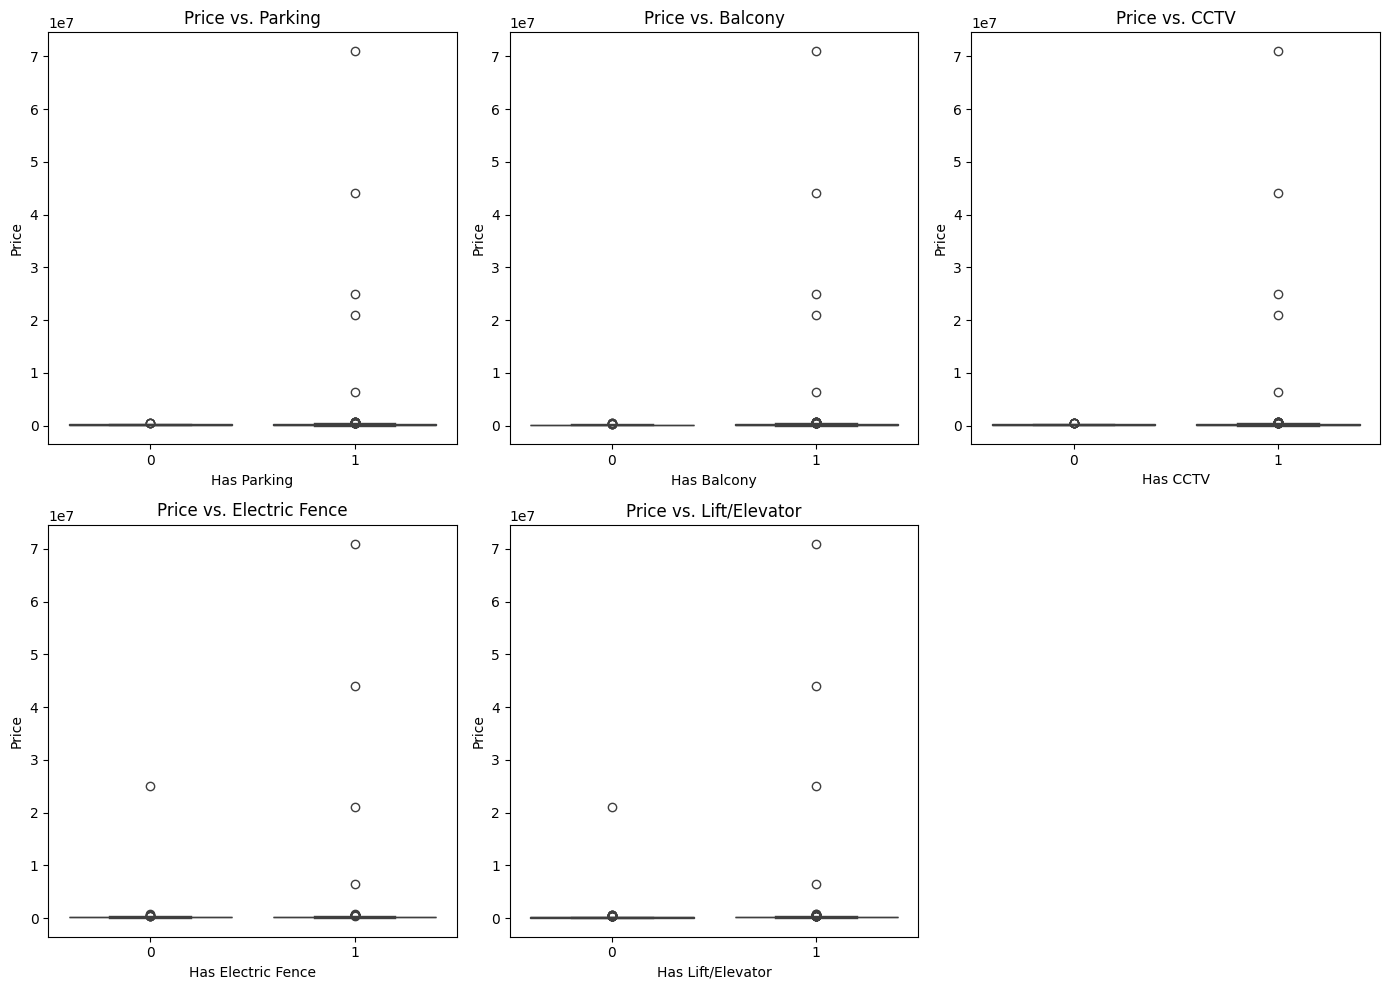

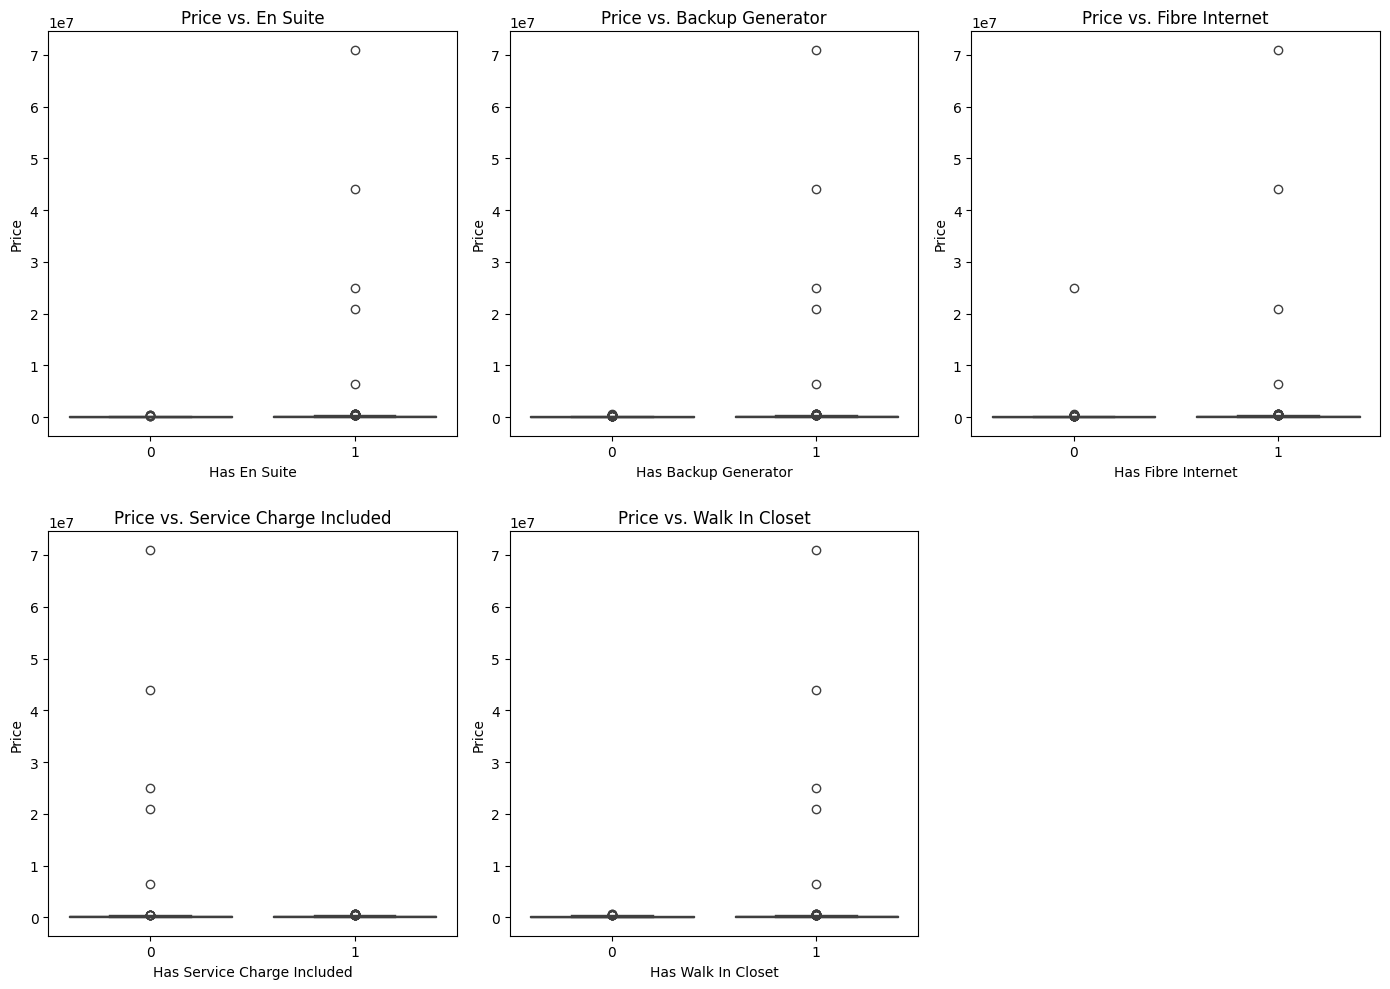

In [21]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_external_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=f'has_{feature}', y='price', data=df)
    plt.title(f'Price vs. {feature}')
    plt.xlabel(f'Has {feature}')
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_internal_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=f'has_{feature}', y='price', data=df)
    plt.title(f'Price vs. {feature}')
    plt.xlabel(f'Has {feature}')
    plt.ylabel('Price')
plt.tight_layout()
plt.show()


In [22]:
#performing statistical tests(t-tests) to determine the significance of these features on house prices.

for feature in top_external_features:
    group1 = df[df[f'has_{feature}'] == 1]['price']
    group2 = df[df[f'has_{feature}'] == 0]['price']
    t_stat, p_value = ttest_ind(group1, group2)
    print(f'{feature}: t-stat={t_stat}, p-value={p_value}')

for feature in top_internal_features:
    group1 = df[df[f'has_{feature}'] == 1]['price']
    group2 = df[df[f'has_{feature}'] == 0]['price']
    t_stat, p_value = ttest_ind(group1, group2)
    print(f'{feature}: t-stat={t_stat}, p-value={p_value}')


Parking: t-stat=0.48700128536023846, p-value=0.6262997254022933
Balcony: t-stat=0.8945110343818775, p-value=0.37113385179278
CCTV: t-stat=1.0226212156322458, p-value=0.30658501492247114
Electric Fence: t-stat=0.0795303481548058, p-value=0.9366171009523332
Lift/Elevator: t-stat=1.1283384061164865, p-value=0.2592843106902641
En Suite: t-stat=0.8743906433597787, p-value=0.3819887741959538
Backup Generator: t-stat=1.6586490065539805, p-value=0.09731083918131962
Fibre Internet: t-stat=0.8563685028477934, p-value=0.391875306602844
Service Charge Included: t-stat=-3.499283297113403, p-value=0.00047459051562679885
Walk In Closet: t-stat=1.6019342303079174, p-value=0.1092953378289217


## Key Findings
* Service Charge Included is the only feature with a statistically significant impact on house prices (p < 0.05).
* Backup Generator is marginally significant and might still be worth considering in further analysis.

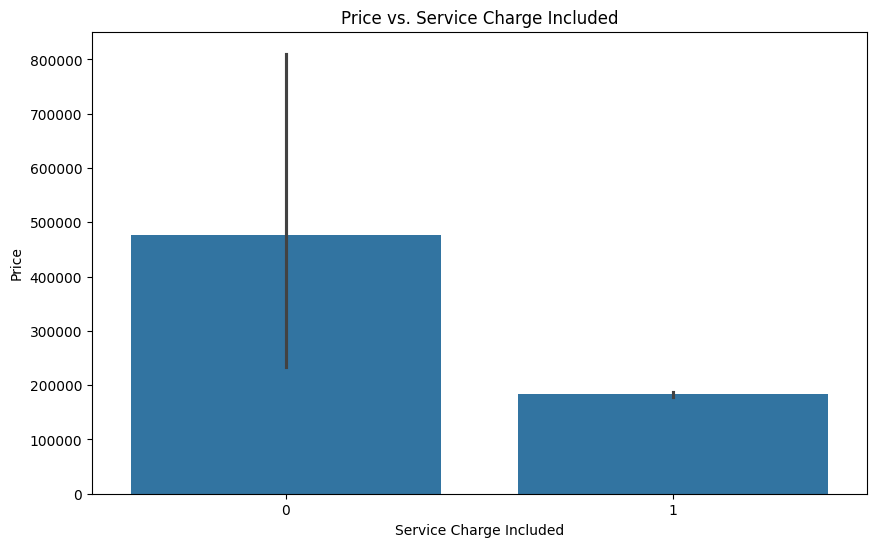

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='has_Service Charge Included', y='price', data=df)
plt.title('Price vs. Service Charge Included')
plt.xlabel('Service Charge Included')
plt.ylabel('Price')
plt.show()


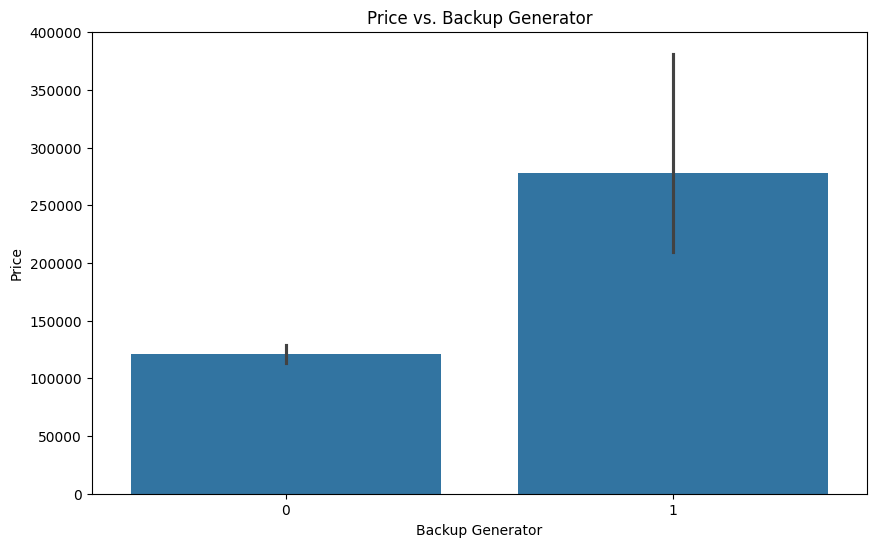

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='has_Backup Generator', y='price', data=df)
plt.title('Price vs. Backup Generator')
plt.xlabel('Backup Generator')
plt.ylabel('Price')
plt.show()


## Insights
### Service Charge Inclusion
From the visual analysis, it was observed that properties without a service charge included in the price tended to have higher overall prices compared to those with the service charge included. This could be because properties with an included service charge are marketed as more affordable or budget-friendly, bundling additional costs into a single payment.

### Backup Generators
Similarly, the analysis indicated that properties equipped with backup generators were generally more expensive. This suggests that the presence of a backup generator is considered a premium feature, adding significant value to the property.

In [25]:
# investigating extreme prices
x = df[(df['price_bin'] == '100-999') | (df['price_bin'] == '1000-9999') | (df['price_bin'] == '1000000-9999999') | (df['price_bin'] == '10000000-71000000')]
x

,bathrooms,bedrooms,external_features,internal_features,location,nearby,price,title,common_external,common_internal,common_nearby,has_Parking,has_Balcony,has_CCTV,has_Electric Fence,has_Lift/Elevator,has_En Suite,has_Backup Generator,has_Fibre Internet,has_Service Charge Included,has_Walk In Closet,price_bin
51,4,4,"Borehole,Garden,Wheelchair Access,Swimming Poo...","Alarm,Backup Generator,Walk In Closet,En Suite...","General Mathenge, Westlands","School,Scenic View,Hospital,Golf Course,Bus Stop",44000000,4 Bed Apartment with En Suite in General Mathenge,"Electric Fence,CCTV,Parking,Lift/Elevator,Balcony","Backup Generator,Walk In Closet,En Suite,Fibre...","School,Scenic View,Hospital,Bus Stop",1,1,1,1,1,1,1,1,0,1,10000000-71000000
372,1,1,Parking,"En Suite,Fibre Internet,Walk In Closet,Service...","Lower Kabete, Westlands",Scenic View,9000,1 Bed Apartment with En Suite in Lower Kabete,Parking,"En Suite,Fibre Internet,Walk In Closet,Service...",Scenic View,1,0,0,0,0,1,0,1,1,1,1000-9999
488,5,3,"Balcony,BBQ,Gym,Gated Community,Kids Play Area...","Aircon,Alarm,Backup Generator,Walk In Closet,E...","2, Lavington","Bus Stop,Shopping Centre,Golf Course,Hospital,...",21000000,3 Bed Apartment with En Suite in Lavington,"Balcony,Parking,CCTV,Electric Fence","Backup Generator,Walk In Closet,En Suite,Fibre...","Bus Stop,Shopping Centre,Hospital,Scenic View,...",1,1,1,1,0,1,1,1,0,1,10000000-71000000
532,3,2,"Balcony,BBQ,CCTV,Electric Fence,Borehole,Garde...","Aircon,Alarm,Backup Generator,En Suite,Fibre I...",Mlolongo,"Bus Stop,Golf Course,Hospital,Scenic View,Scho...",6400000,Furnished 2 Bed Apartment with En Suite in Mlo...,"Balcony,CCTV,Electric Fence,Lift/Elevator,Parking","Backup Generator,En Suite,Fibre Internet,Walk ...","Bus Stop,Hospital,Scenic View,School,Shopping ...",1,1,1,1,1,1,1,1,0,1,1000000-9999999
752,2,2,"Balcony,BBQ,CCTV,Electric Fence,Borehole,Garde...","Aircon,Alarm,Backup Generator,En Suite,Fibre I...",Kilimani,"Bus Stop,Golf Course,Hospital,Scenic View,Scho...",8000,Serviced 2 Bed Apartment with En Suite in Kili...,"Balcony,CCTV,Electric Fence,Lift/Elevator,Parking","Backup Generator,En Suite,Fibre Internet,Servi...","Bus Stop,Hospital,Scenic View,School,Shopping ...",1,1,1,1,1,1,1,1,1,0,1000-9999
1161,2,3,"Balcony,Electric Fence,Swimming Pool,Parking,L...","Aircon,Alarm,Backup Generator,En Suite,Fibre I...","Nyali Area, Nyali","Bus Stop,Golf Course,Hospital,Scenic View,Scho...",10000,Serviced 3 Bed Apartment with En Suite in Nyal...,"Balcony,Electric Fence,Parking,Lift/Elevator","Backup Generator,En Suite,Fibre Internet","Bus Stop,Hospital,Scenic View,School,Shopping ...",1,1,0,1,1,1,1,1,0,0,1000-9999
1632,1,1,"Balcony,CCTV,Parking,Lift/Elevator,Swimming Po...","Aircon,Alarm,Serviced,Backup Generator,En Suit...","Nyali Area, Nyali","Bus Stop,Golf Course,Hospital,School,Shopping ...",5000,Serviced 1 Bed Apartment with En Suite in Nyal...,"Balcony,CCTV,Parking,Lift/Elevator,Electric Fence","Backup Generator,En Suite,Fibre Internet","Bus Stop,Hospital,School,Shopping Centre",1,1,1,1,1,1,1,1,0,0,1000-9999
2024,1,1,"Balcony,Parking",Service Charge Included,"THIKA MAKONGENI, Thika","Bus Stop,Hospital,School,Shopping Centre",7500,1 Bed Apartment with Parking at Thika Makongeni,"Balcony,Parking",Service Charge Included,"Bus Stop,Hospital,School,Shopping Centre",1,1,0,0,0,0,0,0,1,0,1000-9999
2127,1,1,"Balcony,BBQ,Parking,Swimming Pool,CCTV,Electri...","Aircon,Alarm,Serviced,Service Charge Included,...","Rosslyn lone tree estate rd, 1, Rosslyn, Westl...","Bus Stop,Shopping Centre,Golf Course,Hospital,...",1000,Serviced 1 Bed Apartment with En Suite at Ross...,"Balcony,Parking,CCTV,Electric Fence","Service Charge Included,Backup Generator,Walk ...","Bus Stop,Shopping Centre,Hospital,Scenic View,...",1,1,1,1,0,1,1,1,1,1,100-999
2211,3,2,"Balcony,CCTV,Electric Fence,BBQ,Garden,Gym,Lif...","Backup Generator,Alarm,En Suite,Fibre Internet...","Wood avenue, Kilimani","Bus Stop,Hospital,Scenic View,School,Shopping ...",8000,Service

In [26]:
mask = df['price_bin'] == '100-999'
df[mask]

,bathrooms,bedrooms,external_features,internal_features,location,nearby,price,title,common_external,common_internal,common_nearby,has_Parking,has_Balcony,has_CCTV,has_Electric Fence,has_Lift/Elevator,has_En Suite,has_Backup Generator,has_Fibre Internet,has_Service Charge Included,has_Walk In Closet,price_bin
2127,1,1,"Balcony,BBQ,Parking,Swimming Pool,CCTV,Electri...","Aircon,Alarm,Serviced,Service Charge Included,...","Rosslyn lone tree estate rd, 1, Rosslyn, Westl...","Bus Stop,Shopping Centre,Golf Course,Hospital,...",1000,Serviced 1 Bed Apartment with En Suite at Ross...,"Balcony,Parking,CCTV,Electric Fence","Service Charge Included,Backup Generator,Walk ...","Bus Stop,Shopping Centre,Hospital,Scenic View,...",1,1,1,1,0,1,1,1,1,1,100-999


###Insights on Property Price Distribution
* Based on the analysis of price distribution bins, the
majority of properties are priced within the 100,000 to 1,000,000 KES range, followed by properties in the 10,000 to 99,000 KES bin.There are significantly fewer properties in the other bins.
* Notably, the extremely expensive properties, priced between 10,000,000 and 71,000,000 KES, were located in the luxurious suburbs of Lavington and Westlands; however, there were only 2 such properties.
* In contrast, the properties with lower prices predominantly fell within middle estates like Thika, Lower Kabete, and Bamburi.

In [27]:
# dropping row with 1000 price
df.drop(df[mask].index, inplace=True)

# Geographical Analysis

In [28]:
# Creating suburb column
df['suburb'] = df['location'].apply(lambda x: x.split(',')[-1].strip())

In [29]:
suburb_replacements = {
    '0425n': 'Karen',
    '01': 'Kileleshwa',
    '047': 'Lavington',
    '55': 'Riara',
    '77': 'Riara',
    'Westlands Area' : 'Westlands'
}

# Replace the old values with new values in the 'suburb' column
df['suburb'].replace(suburb_replacements, inplace=True)

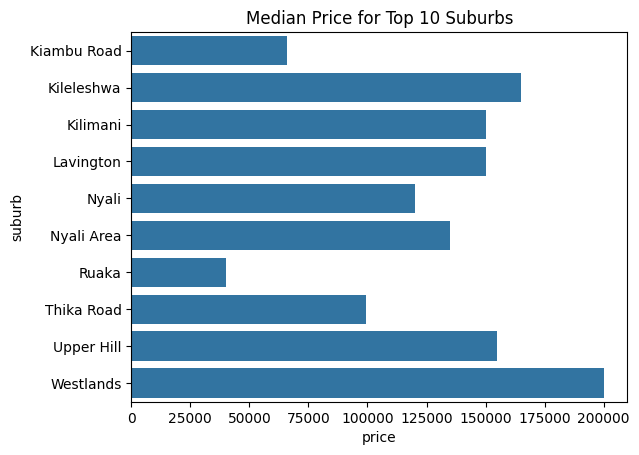

In [30]:
top_10 = df['suburb'].value_counts().head(10).index
filtered = df[df['suburb'].isin(top_10)]
grouped = filtered.groupby('suburb')['price'].median().reset_index()
sns.barplot(y='suburb', x='price', data=grouped, orient='h')
plt.title("Median Price for Top 10 Suburbs")
plt.show()

In [31]:
numerical_columns = df.select_dtypes(include='int64')
numerical_columns.var()

bathrooms                      1.041439e+00
bedrooms                       8.638164e-01
price                          3.184831e+12
has_Parking                    3.403160e-02
has_Balcony                    6.659540e-02
has_CCTV                       1.038652e-01
has_Electric Fence             1.530842e-01
has_Lift/Elevator              1.598731e-01
has_En Suite                   5.099958e-02
has_Backup Generator           1.408732e-01
has_Fibre Internet             1.601110e-01
has_Service Charge Included    1.785505e-01
has_Walk In Closet             2.238303e-01
dtype: float64

#### Suburb vs. Features: Explore how different features vary across suburbs.

In [32]:
# Filter the DataFrame to include only the top 10 suburbs
df_top_10 = df[df['suburb'].isin(top_10)]


In [33]:
# Function to count feature occurrences for columns with comma-separated values
def count_features_by_suburb(df, column_name):
    feature_counts = {}
    for suburb in df['suburb'].unique():
        suburb_df = df[df['suburb'] == suburb]
        all_features = suburb_df[column_name].str.split(',').explode()
        feature_counts[suburb] = all_features.value_counts()
    return pd.DataFrame(feature_counts).fillna(0).astype(int).T


In [34]:
# Count features by suburb for common_external, common_internal, and common_nearby
external_feature_counts = count_features_by_suburb(df_top_10, 'common_external')
internal_feature_counts = count_features_by_suburb(df_top_10, 'common_internal')
nearby_feature_counts = count_features_by_suburb(df_top_10, 'common_nearby')

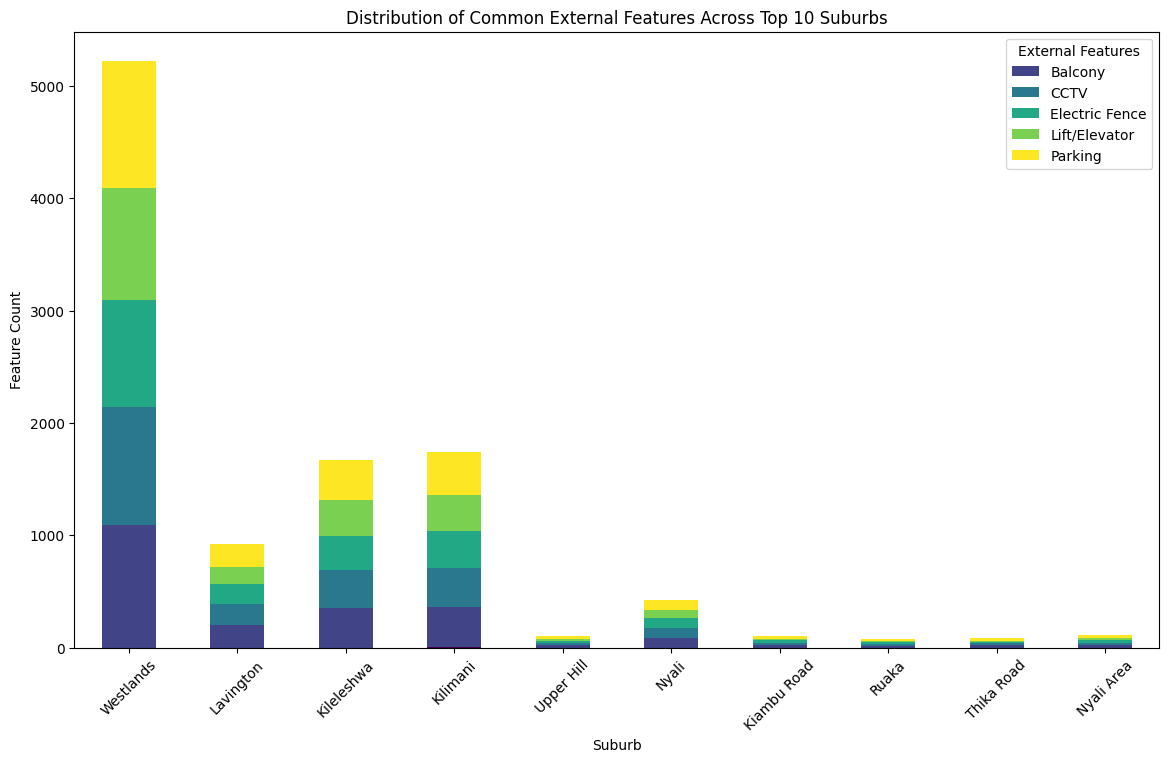

In [35]:
# Plotting the distribution of external features across the top 10 suburbs
external_feature_counts.plot(kind='bar', figsize=(14, 8), stacked=True, colormap='viridis')
plt.title('Distribution of Common External Features Across Top 10 Suburbs')
plt.xlabel('Suburb')
plt.ylabel('Feature Count')
plt.legend(title='External Features')
plt.xticks(rotation=45)
plt.show()


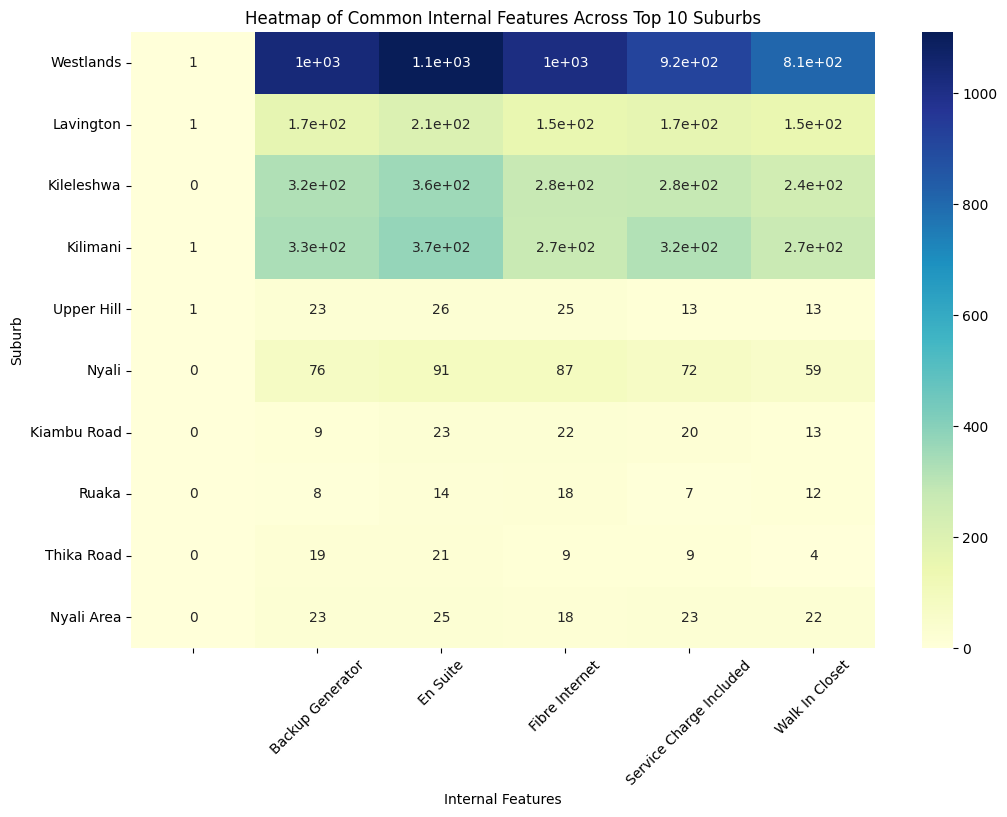

In [36]:
# Heatmap for internal features
plt.figure(figsize=(12, 8))
sns.heatmap(internal_feature_counts, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Common Internal Features Across Top 10 Suburbs')
plt.xlabel('Internal Features')
plt.ylabel('Suburb')
plt.xticks(rotation=45)
plt.show()

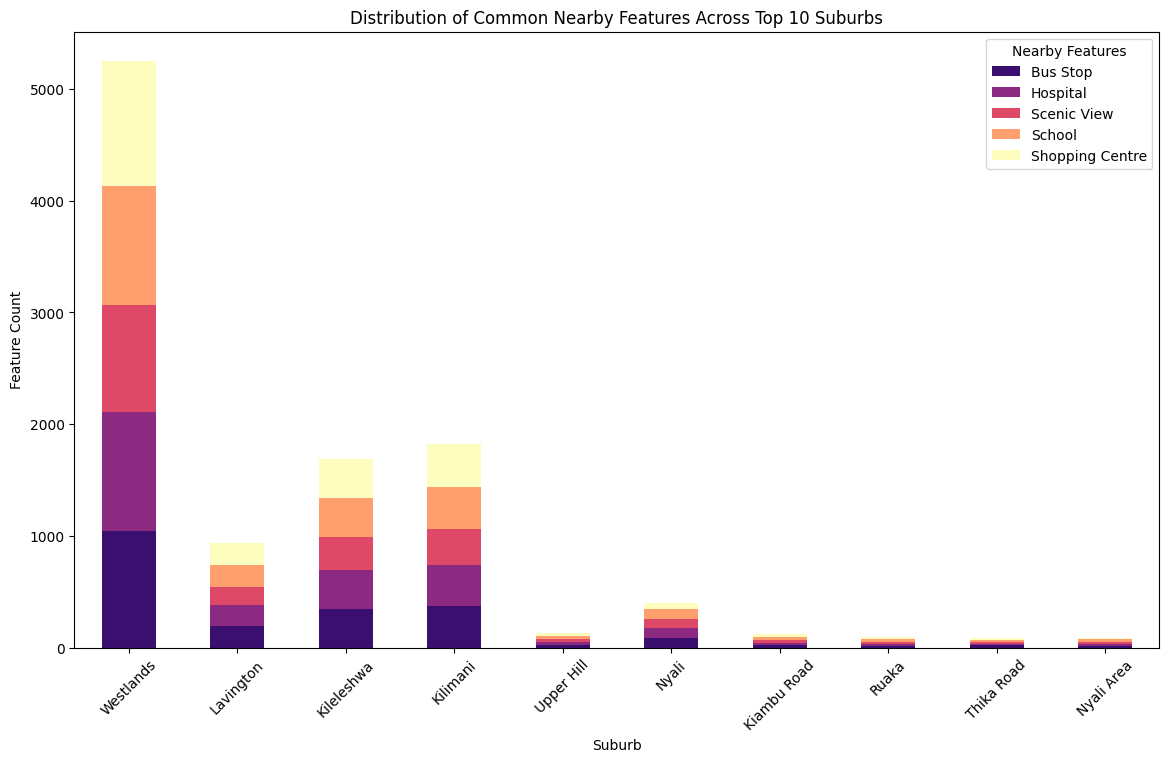

In [37]:
# Plotting the distribution of nearby features across the top 10 suburbs
nearby_feature_counts.plot(kind='bar', figsize=(14, 8), stacked=True, colormap='magma')
plt.title('Distribution of Common Nearby Features Across Top 10 Suburbs')
plt.xlabel('Suburb')
plt.ylabel('Feature Count')
plt.legend(title='Nearby Features')
plt.xticks(rotation=45)
plt.show()

# Text Analysis




In [38]:
# Combine all titles into a single string
all_titles = ' '.join(df['title'])

# Convert to lowercase
all_titles = all_titles.lower()

# Remove punctuation
all_titles = all_titles.translate(str.maketrans('', '', string.punctuation))

# Remove stopwords
stop_words = set(stopwords.words('english'))
all_titles = ' '.join(word for word in all_titles.split() if word not in stop_words)

# Remove other common words that may not be informative
additional_stopwords = {'bed', 'bath', 'apartment', 'house', 'furnished', 'with', 'en', 'suite'}
all_titles = ' '.join(word for word in all_titles.split() if word not in additional_stopwords)

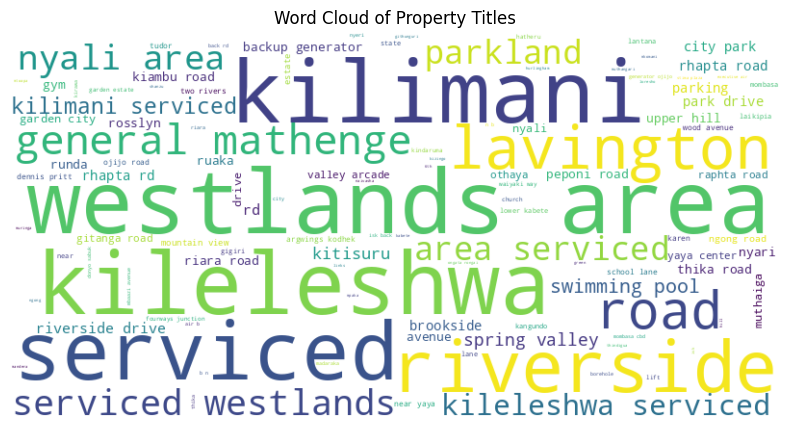

In [39]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Property Titles')
plt.show()
